In [1]:
# Importar librerías
import agentpy as ap
import matplotlib.pyplot as plt
import seaborn as sns
import IPython

In [20]:
class ModeloLimpieza(ap.Model):

    def setup(self):

        # Crear agentes (Celdas)
        n_celdas = int(self.p['Densidad de celdas'] * (self.p.size**2))
        celdas = self.agents = ap.AgentList(self, n_celdas)

        # Crear grid (Piso)
        self.piso = ap.Grid(self, [self.p.size]*2, track_empty=True)
        self.piso.add_agents(celdas, random=True, empty=True)

        # Variable dinámica para el estado de cada una de las celdas
        # Condition 0: Sucio, 1: Limpiando, 2: Limpio
        self.agents.condition = 0

        # Empezar a limpiar desde [1,1]
        celdasLimpiando = self.piso.agents[1,1]
        celdasLimpiando.condition = 1

    def step(self):

        # Seleccionar celdas limpiándose
        celdasLimpiando = self.agents.select(self.agents.condition == 1)

        # Buscar celdas sucias cercanas a la limpia
        for celdas in celdasLimpiando:
            for neighbor in self.piso.neighbors(celdas):
                if neighbor.condition == 0: #Si la celda está sucia
                    neighbor.condition = 1 # Se limpia la celda sucia
                if neighbor.condition == 1 | neighbor.condition == 2: #Si la celda está limpiándose o está limpia
                    self.piso.remove_agents(neighbor)
            celdasLimpiando.condition = 2 # Se termina de limpiar la celda

        # Detener la simulación si todas las celdas están limpias
        if len(celdasLimpiando) == 0:
            self.stop()

    def end(self):

        # Recabar datos de la simulación
        celdas_Limpias = len(self.agents.select(self.agents.condition == 2))
        self.report('Porcentaje de celdas limpias: ',
                    celdas_Limpias / len(self.agents))

In [32]:
# Definir parámetros iniciales

parameters = {
    'Densidad de celdas': 0.6, # % de celdas en el piso
    'size': 50, # Medidas del grid
    'steps': 100, #Tiempo máximo de ejecución
}

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

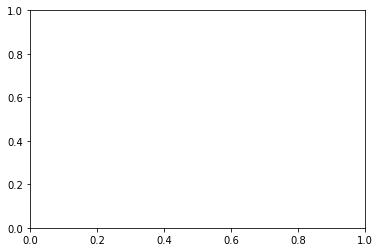

In [33]:
# Animacion que representa la limpieza de celdas

def animation_plot(model, ax):
    attr_grid = model.piso.attr_grid('condition')
    color_dict = {0:'#523A0A', 1:'#0FF7F7', 2:'#FFFFFF', None:'#A1A0A0'}
    ap.gridplot(attr_grid, ax=ax, color_dict=color_dict, convert=True)
    ax.set_title(f"Simulación de la limpieza de un piso\n"
                 f"Tiempo: {model.t}, Celdas sucias restantes: "
                 f"{len(model.agents.select(model.agents.condition == 0))}",color = "white")

fig, ax = plt.subplots()
model = ModeloLimpieza(parameters)
animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml(fps=15))